The Titanic competion is a classification problem: given some info on a passenger, we determine if they survived.

So, two categories represented by the "Survived" boolean columns in the dataset: Yes=1 and Dead=0.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Data Exploration

### Checking the format of the data

In [2]:
train_data = pd.read_csv("../input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("../input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Basic stats on numeric columns

In [6]:
train_data_numeric = train_data.select_dtypes('number')
train_data_numeric.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survival depending on the gender

In [7]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Data Selection

In [9]:
### dropping data with missing cabin number
# train_data = train_data.dropna(axis=0, subset=['Cabin'])

# checking data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Classifier Model Initialization and Validation

In [10]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# for data validation
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Decision Tree Classifier

Decision Tree Model has score = 0.7757847533632287


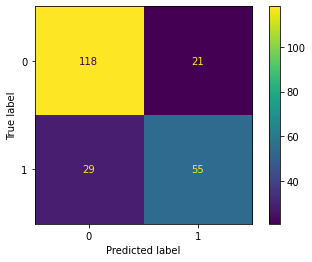

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(train_X, train_y)

val_predictions = dt_model.predict(val_X)
dt_score = accuracy_score(val_y, val_predictions)
print(f"Decision Tree Model has score = {dt_score}")

plot_confusion_matrix(dt_model, val_X, val_y)

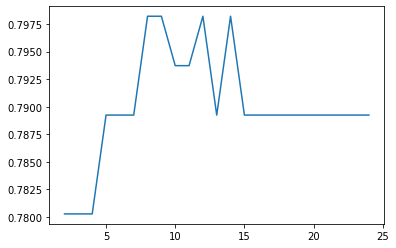

In [12]:
def get_score(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    accuracy = accuracy_score(val_y, preds_val)
    return accuracy

get_score(5, train_X, val_X, train_y, val_y)

# max leaf nodes = mln
import numpy as np
mln_list = np.arange(2, 25, dtype=int)

# Write loop to find the ideal tree size from candidate_max_leaf_nodes

score_list = [get_score(cmax, train_X, val_X, train_y, val_y) for cmax in mln_list]

plt.plot(mln_list, score_list)


Okay, so this model is underfitting below 7-ish leaf nodes, and overfitting above 15-ish leaf nodes.

So for the actual prediction, we should use a "max_leaf_nodes" between 7 and 15. Let's say 9.

### Random Forest Classifier

Random Forest Model has score = 0.8071748878923767


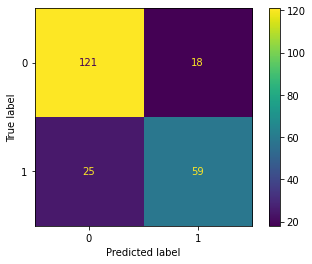

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=60, max_depth=5, random_state=1)

rf_model.fit(train_X, train_y)
val_predictions = rf_model.predict(val_X)
rf_score = accuracy_score(val_y, val_predictions)

print(f"Random Forest Model has score = {rf_score}")

plot_confusion_matrix(rf_model, val_X, val_y)

Scanning over "n_estimators"

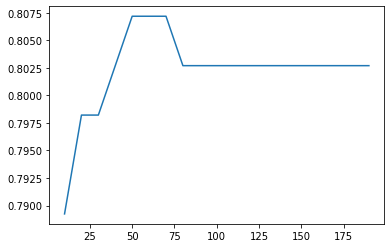

In [14]:
def get_score(n_estimators, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    accuracy = accuracy_score(val_y, preds_val)
    return accuracy

get_score(5, train_X, val_X, train_y, val_y)

# n_estimators = ne
ne_list = np.arange(10, 200, 10, dtype=int)

# Write loop to find the ideal tree size from candidate_max_leaf_nodes

score_list = [get_score(ne, train_X, val_X, train_y, val_y) for ne in ne_list]

plt.plot(ne_list, score_list)


Maximum seems to be reached for n_estimators = 60

Scanning over "max_depth"

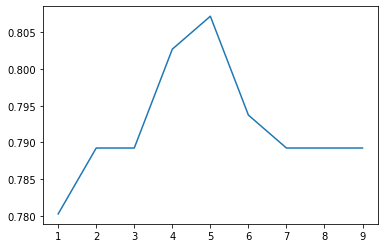

In [15]:
def get_score(max_depth, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(n_estimators=60, max_depth=max_depth, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    accuracy = accuracy_score(val_y, preds_val)
    return accuracy

get_score(5, train_X, val_X, train_y, val_y)

# max_features = mf
mf_list = np.arange(1, 10, dtype=int)

# Write loop to find the ideal tree size from candidate_max_leaf_nodes

score_list = [get_score(mf, train_X, val_X, train_y, val_y) for mf in mf_list]

plt.plot(mf_list, score_list)


Maximum seems to be reached for max_depth=5

Scanning over "max_leaf_nodes"

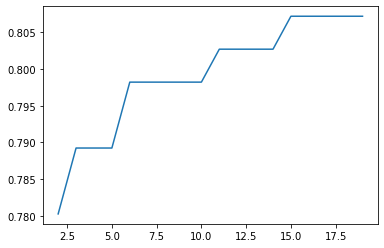

In [16]:
def get_score(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(n_estimators=60, max_depth=5, max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    accuracy = accuracy_score(val_y, preds_val)
    return accuracy

get_score(5, train_X, val_X, train_y, val_y)

# max_leaf_nodes = mlb
mln_list = np.arange(2, 20, dtype=int)

# Write loop to find the ideal tree size from candidate_max_leaf_nodes

score_list = [get_score(mf, train_X, val_X, train_y, val_y) for mf in mln_list]

plt.plot(mln_list, score_list)


Plateau reached from max_depth>=12. So leaving this parameter to None, (infinite).

# Creating the submission file

The submission file is composed of 2 columns: the ID of the passengers, and a boolean expressing their survival.

In [17]:
### based on the study of the Decision Tree Model
final_model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

### based on the study of the Random Forest Model
final_model = RandomForestClassifier(n_estimators=60, max_depth=5, random_state=1)

final_model.fit(X, y)
predictions = final_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Quick checking of the submission file format.

In [18]:
submission_data = pd.read_csv("my_submission.csv")
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
